# <center> Communicate Data Findings <center> #

## <center> Ford GoBike Data Investigation Explanatory Analysis <center> ##

### <center> By: Marwan Selim <center> ###

![alt text](GoBike.png "Ford GoBike")

## Project Overview ##

The Analysis is the final project of Udacity Advanced Data Analytics Nanodegree and it focuses on doing a complete analysis of an actual data set by Ford GoBike.

The project demonstrate the different phases of data analysis including:

1- Data Pulling/Gathering.

2- Preliminary Exploration.

3- Cleaning & Wrangling.

4- Exploratory Data Analysis Visualization.

5- Explanatory Data Visualisation.



## The Dataset: ##

[Ford GoBike](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv) is a data set of trips from February 2019 covering 183,412 entries with 16 initial variables.

#### The variables can be grouped into: ####

* Trip Duration (seconds)

* Start Station (ID, Name, Longitude & Latitude)

* End Station (ID, Name, Longitude & Latitude)

* Bike ID

* Start & End Times

* User Type, Gender, Birthyear & Whether they use bikeshare for all trips

#### The Variables are then cleaned & wrangleded to cover 174,668 entries with also 16 variables ####

* Trip Duration (seconds) & Distance (meters)
* Start Station (ID & Name)
* End Station (ID & Name)
* Bike ID
* Start & End Hours
* Start Weekdays
* Start Date
* User Type, Gender, Age, Age Group & Whether they use bikeshare for all trips

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sin, cos, sqrt, atan2, radians
from statistics import mode
import plotly.express as px

%matplotlib inline

In [2]:
df=pd.read_csv('clean_feb2019_fordgobike.csv')
df.shape

(174606, 16)

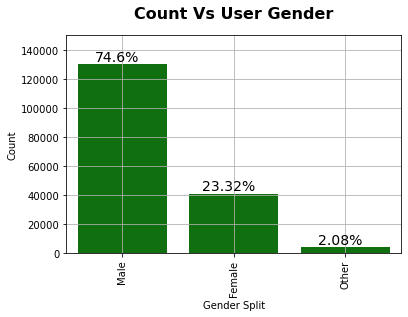

In [3]:
ax = sns.countplot(data=df, x='member_gender', color='green');
for p in ax.patches:
    ax.annotate(f'{(100*p.get_height()/df.shape[0]).round(2)}%', (p.get_x()+0.35, p.get_height()), ha='center', va='bottom', color='black', size=14)
plt.xlabel('Gender Split');
plt.ylim(0,150000)
plt.xticks(rotation=90);
plt.ylabel('Count');
plt.grid()
plt.title('Count Vs User Gender', y=1.05, fontsize=16, fontweight='bold', color = 'black');
plt.show()

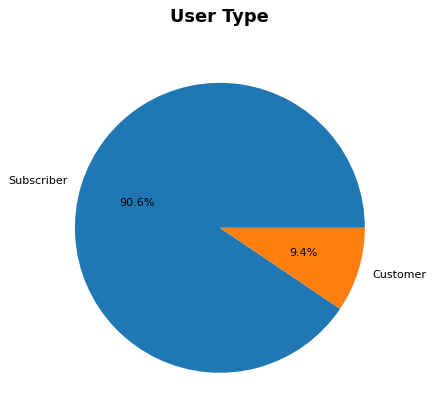

In [4]:
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.pie(df['user_type'].value_counts(),labels=df['user_type'].value_counts().index,autopct= '%1.1f%%')
plt.title('User Type', y=1.05, fontsize=16, fontweight='bold', color = 'black');

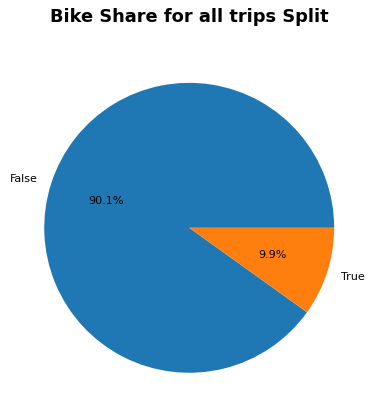

In [5]:
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.pie(df['bike_share_for_all_trip'].value_counts(),labels=df['bike_share_for_all_trip'].value_counts().index,autopct= '%1.1f%%')
plt.title('Bike Share for all trips Split', y=1.05, fontsize=16, fontweight='bold', color = 'black');

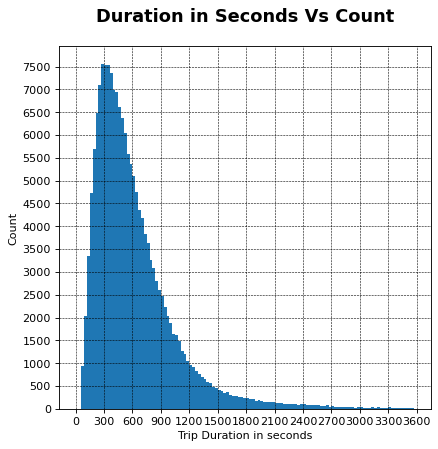

In [6]:
fig=plt.figure(figsize=(6,6), dpi= 80, facecolor='w', edgecolor='k')

bins = np.arange(0, 3600, 30)
ticks = np.arange(0, 3900, 300)
yticks = np.arange(0,8000,500)
plt.hist(data=df, x='duration_sec', bins=bins);
plt.xticks(ticks);
plt.yticks(yticks);
plt.xlabel('Trip Duration in seconds');
plt.ylabel('Count')
plt.title('Duration in Seconds Vs Count', y=1.05, fontsize=16, fontweight='bold', color = 'black');
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5);

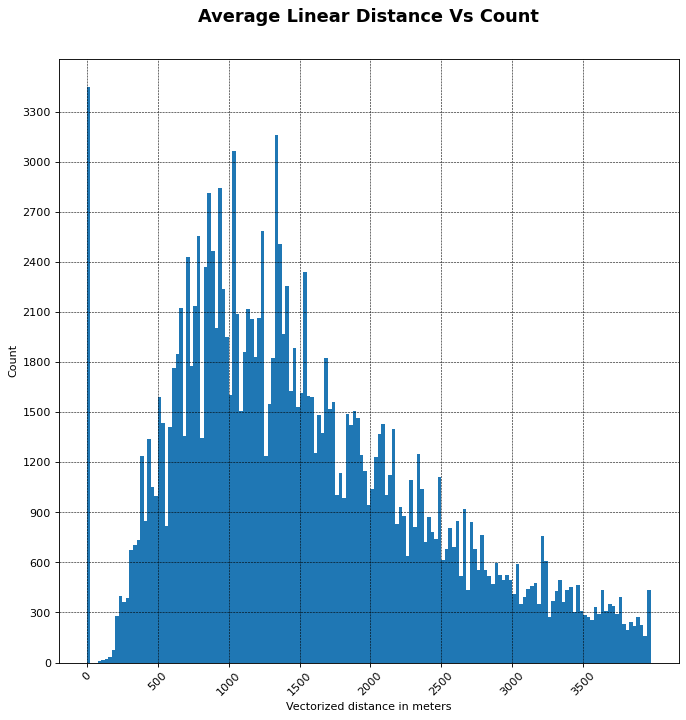

In [7]:
fig=plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')

bins = np.arange(0, 4000, 25)
ticks = np.arange(0, 4000, 500)
yticks = np.arange(0,3600,300)
plt.hist(data=df, x='linear_distance_meters', bins=bins);
plt.xticks(ticks, rotation=45);
plt.yticks(yticks);
plt.xlabel('Vectorized distance in meters');
plt.ylabel('Count')
plt.title('Average Linear Distance Vs Count', y=1.05, fontsize=16, fontweight='bold', color = 'black');
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5);

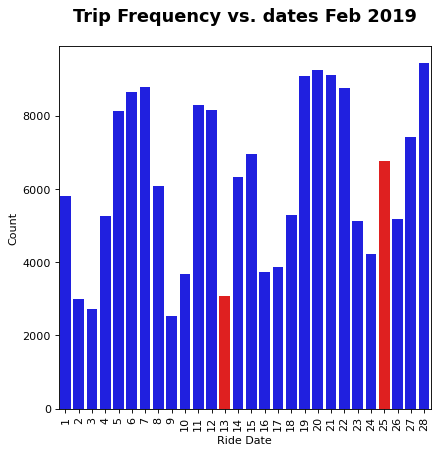

In [8]:
fig=plt.figure(figsize=(6,6), dpi= 80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90);
sns.barplot(data=df, x=df['start_date'].value_counts().index, y=df['start_date'].value_counts().values, palette=['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b']);
plt.xlabel('Ride Date');
plt.ylabel('Count');
plt.title('Trip Frequency vs. dates Feb 2019', y=1.05, fontsize=16, fontweight='bold', color = 'black');


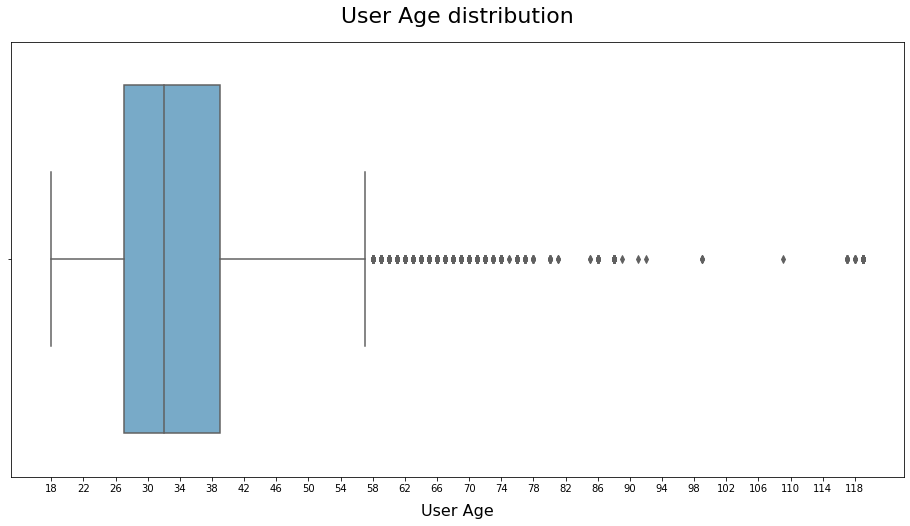

In [9]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='age', palette='Blues', orient='h')
plt.title("User Age distribution", fontsize=22, y=1.03)
plt.xlabel("User Age", fontsize=16, labelpad=10)
plt.xticks(np.arange(18,122,4))
plt.show()

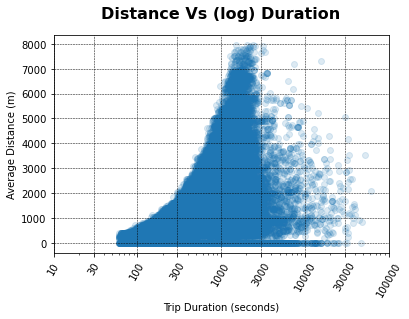

In [10]:
g=sns.regplot(x='duration_sec', y='linear_distance_meters', data=df, scatter_kws={'alpha' : 0.15}, fit_reg=False)
g.set(xscale='log')
plt.xlabel('Trip Duration (seconds)');
plt.xticks([10,30,100,300,1000,3000,10000,30000,100000], [10,30,100,300,1000,3000,10000,30000,100000], rotation=60);
plt.ylabel('Average Distance (m)');
plt.title('Distance Vs (log) Duration', y=1.05, fontsize=16, fontweight='bold', color = 'black');
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5);

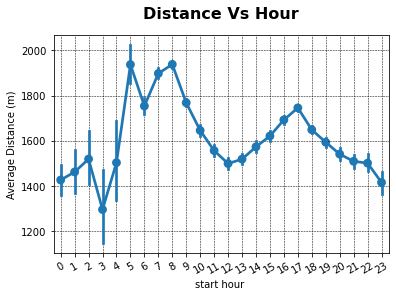

In [11]:
sns.pointplot(x='start_hour', y='linear_distance_meters', data=df)
plt.xlabel('start hour ');
plt.xticks(rotation=30);
plt.ylabel('Average Distance (m)');
plt.title('Distance Vs Hour', y=1.05, fontsize=16, fontweight='bold', color = 'black');
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5);

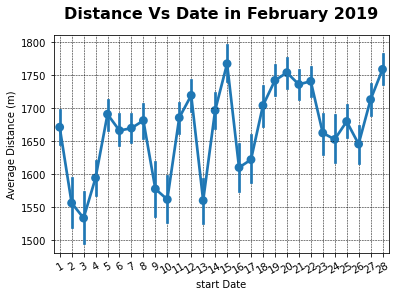

In [12]:
sns.pointplot(x='start_date', y='linear_distance_meters', data=df)
plt.xlabel('start Date');
plt.xticks(rotation=30);
plt.ylabel('Average Distance (m)');
plt.title('Distance Vs Date in February 2019', y=1.05, fontsize=16, fontweight='bold', color = 'black');
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5);

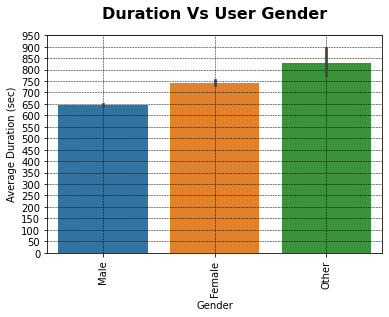

In [13]:
sns.barplot(x='member_gender', y='duration_sec', data=df)
plt.xlabel('Gender');
plt.xticks(rotation=90);
plt.yticks(np.arange(0,1000,50));
plt.ylabel('Average Duration (sec)');
plt.title('Duration Vs User Gender', y=1.05, fontsize=16, fontweight='bold', color = 'black');
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5);

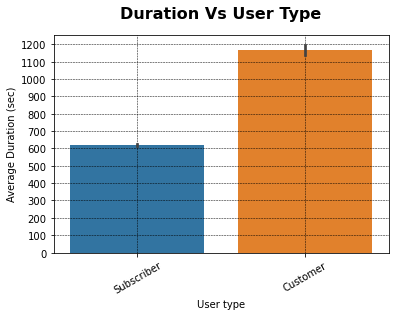

In [14]:
sns.barplot(x='user_type', y='duration_sec', data=df)
plt.xlabel('User type');
plt.xticks(rotation=30);
plt.yticks(np.arange(0,1300,100));
plt.ylabel('Average Duration (sec)');
plt.title('Duration Vs User Type', y=1.05, fontsize=16, fontweight='bold', color = 'black');
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5);

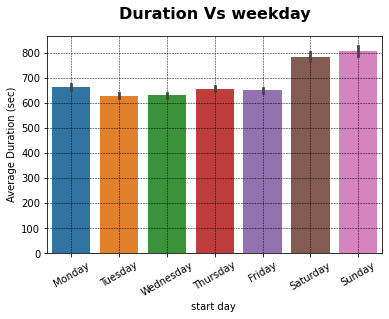

In [15]:
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='start_day', y='duration_sec', data=df, order = order)
plt.xlabel('start day ');
plt.xticks(rotation=30);
plt.ylabel('Average Duration (sec)');
plt.title('Duration Vs weekday', y=1.05, fontsize=16, fontweight='bold', color = 'black');
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5);

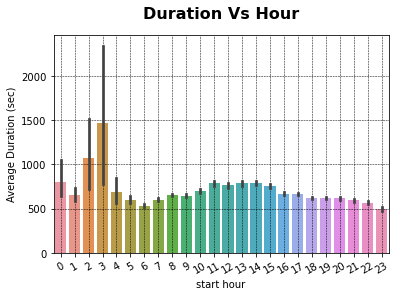

In [16]:
sns.barplot(x='start_hour', y='duration_sec', data=df)
plt.xlabel('start hour');
plt.xticks(rotation=30);
plt.ylabel('Average Duration (sec)');
plt.title('Duration Vs Hour', y=1.05, fontsize=16, fontweight='bold', color = 'black');
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5);

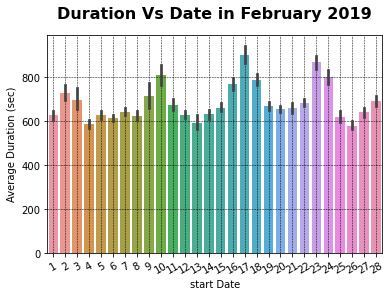

In [17]:
sns.barplot(x='start_date', y='duration_sec', data=df)
plt.xlabel('start Date');
plt.xticks(rotation=30);
plt.ylabel('Average Duration (sec)');
plt.title('Duration Vs Date in February 2019', y=1.05, fontsize=16, fontweight='bold', color = 'black');
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5);

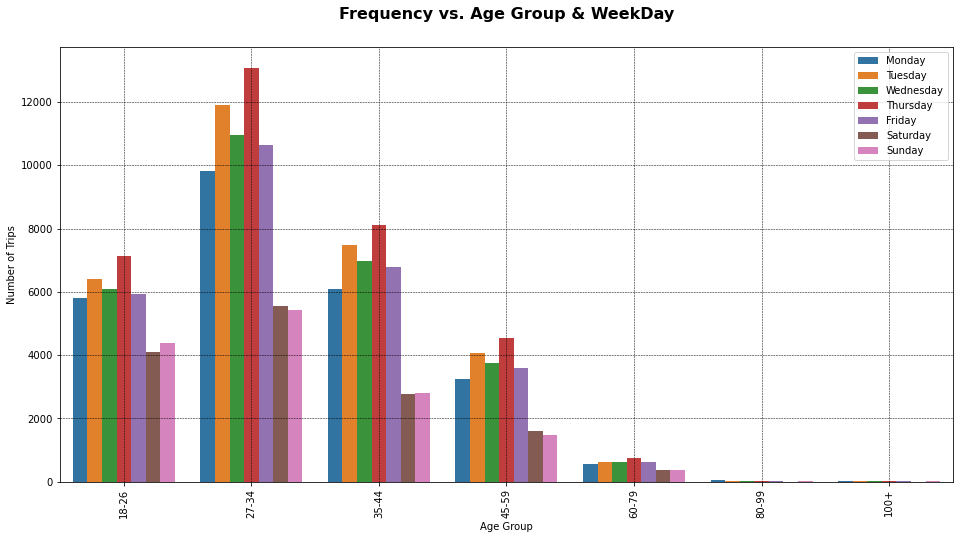

In [18]:
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ageorder = ['18-26', '27-34', '35-44', '45-59', '60-79', '80-99', '100+']
plt.figure(figsize=(16,8))
sns.countplot(x='age_group', hue='start_day', data=df, order=ageorder, hue_order=order)
plt.xlabel('Age Group');
plt.xticks(rotation=90);
plt.ylabel('Number of Trips');
plt.legend()
plt.title('Frequency vs. Age Group & WeekDay', y=1.05, fontsize=16, fontweight='bold', color = 'black');
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5);

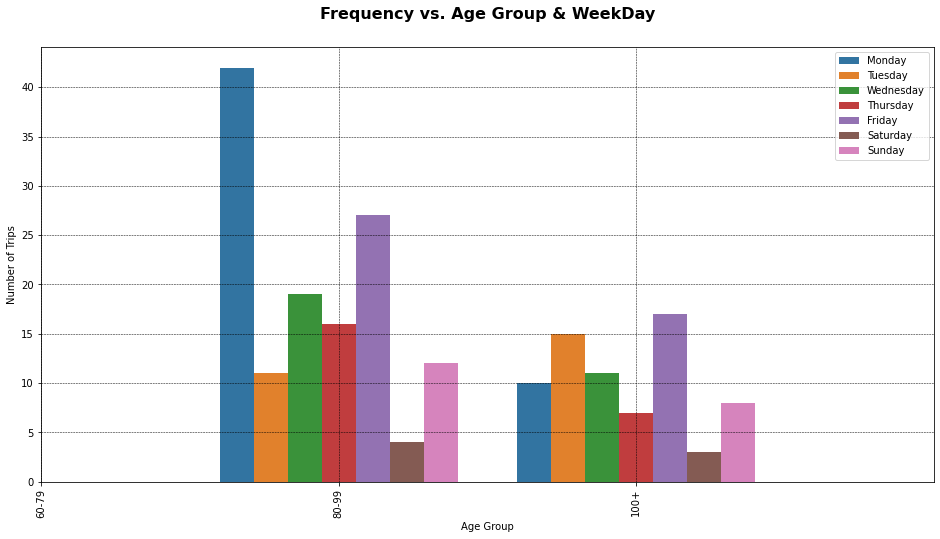

In [19]:
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(16,8))
sns.countplot(data=df.query('age >= 80'), x='age_group', hue='start_day', order=ageorder, hue_order=order)
plt.xlabel('Age Group');
plt.xticks(rotation=90);
plt.xlim(4, 7)
plt.ylabel('Number of Trips');
plt.legend()
plt.title('Frequency vs. Age Group & WeekDay', y=1.05, fontsize=16, fontweight='bold', color = 'black');
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5);

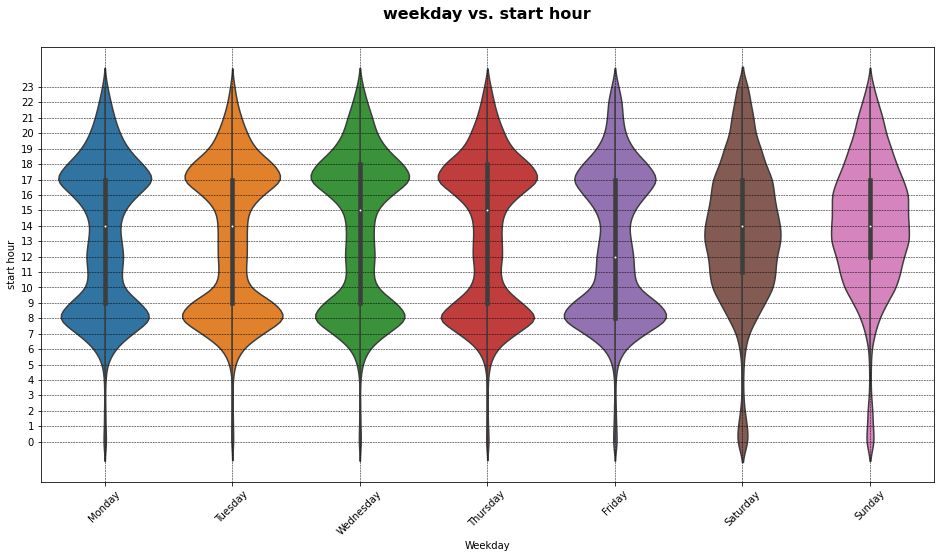

In [20]:
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(16,8))
sns.violinplot(x='start_day', y='start_hour', data=df, order=order)
plt.xlabel('Weekday');
plt.xticks(rotation=45);
plt.ylabel('start hour');
plt.yticks(np.arange(0,24,1))
plt.title('weekday vs. start hour', y=1.05, fontsize=16, fontweight='bold', color = 'black');
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5);

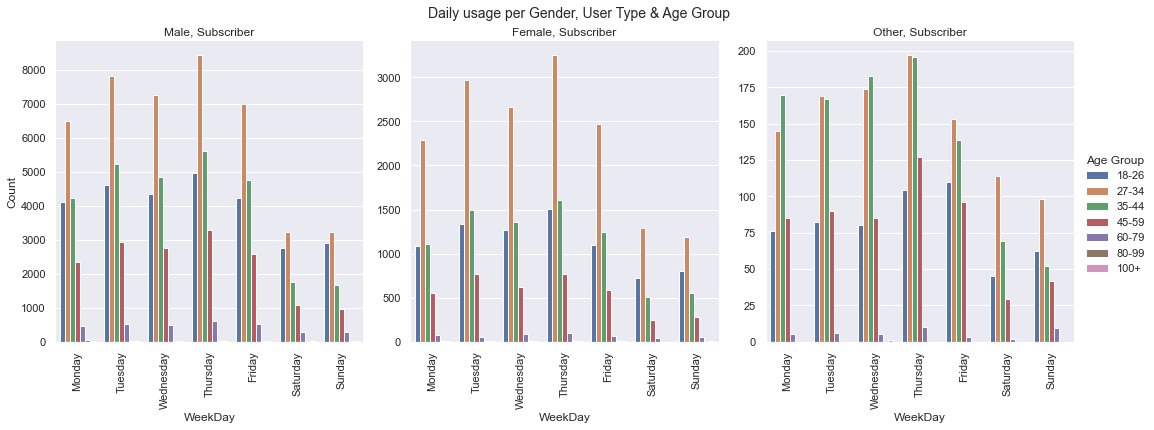

In [28]:
sns.set(rc={'figure.figsize':(21,21)})
g = sns.catplot(data=df.query('user_type == "Subscriber"'), x='start_day', col="member_gender", row='user_type', hue='age_group', kind='count', sharey=False, hue_order=ageorder, order = order)
g.set_axis_labels('WeekDay', 'Count', '{row_name}')
g.set_xticklabels(rotation=90)
g._legend.set_title('Age Group')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily usage per Gender, User Type & Age Group', fontsize=14, y=1.02);

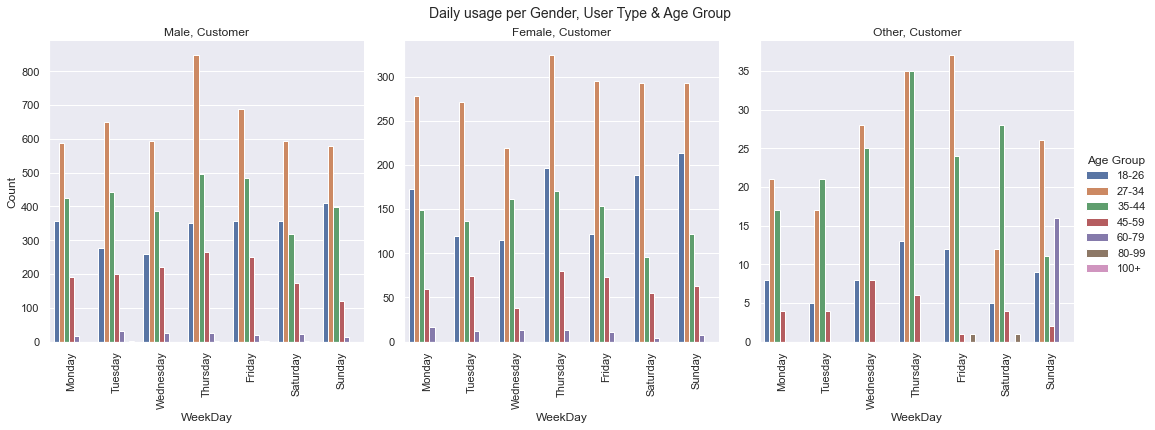

In [29]:
sns.set(rc={'figure.figsize':(21,21)})
g = sns.catplot(data=df.query('user_type == "Customer"'), x='start_day', col="member_gender", row='user_type', hue='age_group', kind='count', sharey=False, hue_order=ageorder, order = order)
g.set_axis_labels('WeekDay', 'Count', '{row_name}')
g.set_xticklabels(rotation=90)
g._legend.set_title('Age Group')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily usage per Gender, User Type & Age Group', fontsize=14, y=1.02);

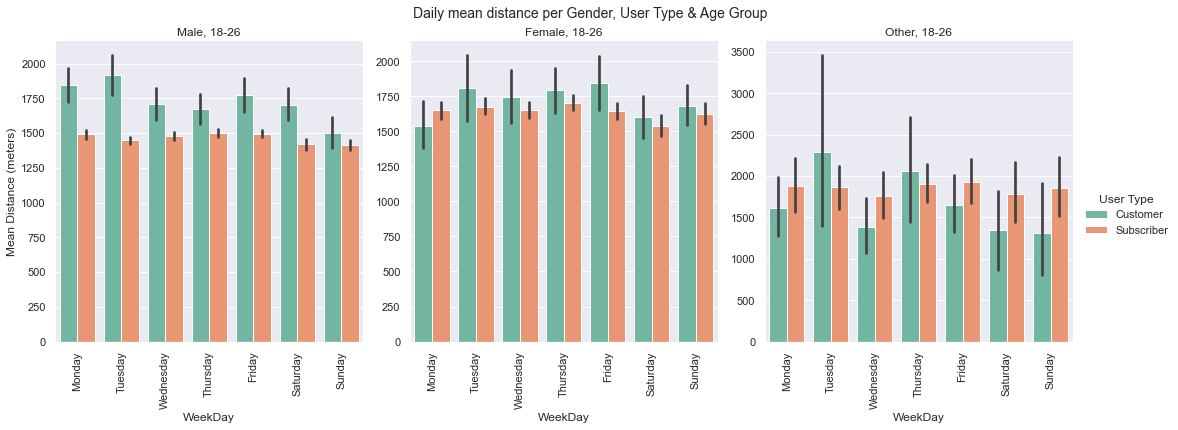

In [34]:
sns.set(rc={'figure.figsize':(16,16)})
g = sns.catplot(data=df.query('age_group == "18-26"'), col="member_gender", row='age_group', hue='user_type', palette="Set2",order=order, sharey=False, kind='bar', y='linear_distance_meters', x='start_day') 
g.set_axis_labels('WeekDay', 'Mean Distance (meters)', '{row_name}')
g.set_xticklabels(rotation=90)
g._legend.set_title('User Type')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily mean distance per Gender, User Type & Age Group', fontsize=14, y=1.02);

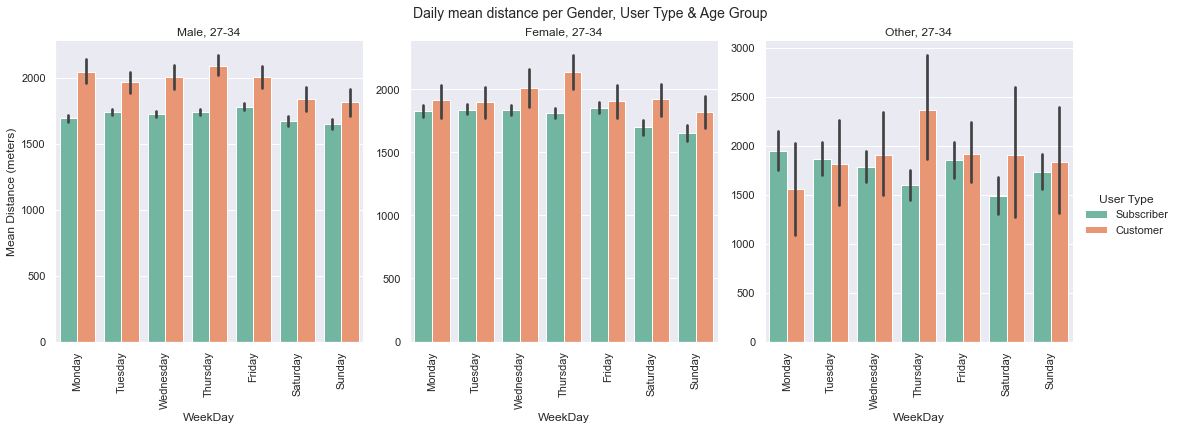

In [32]:
sns.set(rc={'figure.figsize':(16,16)})
g = sns.catplot(data=df.query('age_group == "27-34"'), col="member_gender", row='age_group', hue='user_type', palette="Set2",order=order, sharey=False, kind='bar', y='linear_distance_meters', x='start_day') 
g.set_axis_labels('WeekDay', 'Mean Distance (meters)', '{row_name}')
g.set_xticklabels(rotation=90)
g._legend.set_title('User Type')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily mean distance per Gender, User Type & Age Group', fontsize=14, y=1.02);

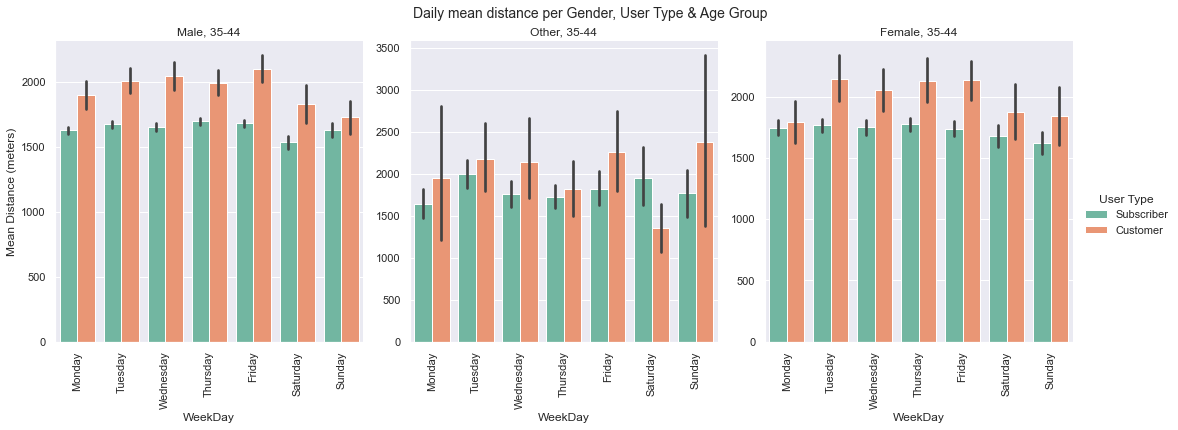

In [33]:
sns.set(rc={'figure.figsize':(16,16)})
g = sns.catplot(data=df.query('age_group == "35-44"'), col="member_gender", row='age_group', hue='user_type', palette="Set2",order=order, sharey=False, kind='bar', y='linear_distance_meters', x='start_day') 
g.set_axis_labels('WeekDay', 'Mean Distance (meters)', '{row_name}')
g.set_xticklabels(rotation=90)
g._legend.set_title('User Type')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily mean distance per Gender, User Type & Age Group', fontsize=14, y=1.02);

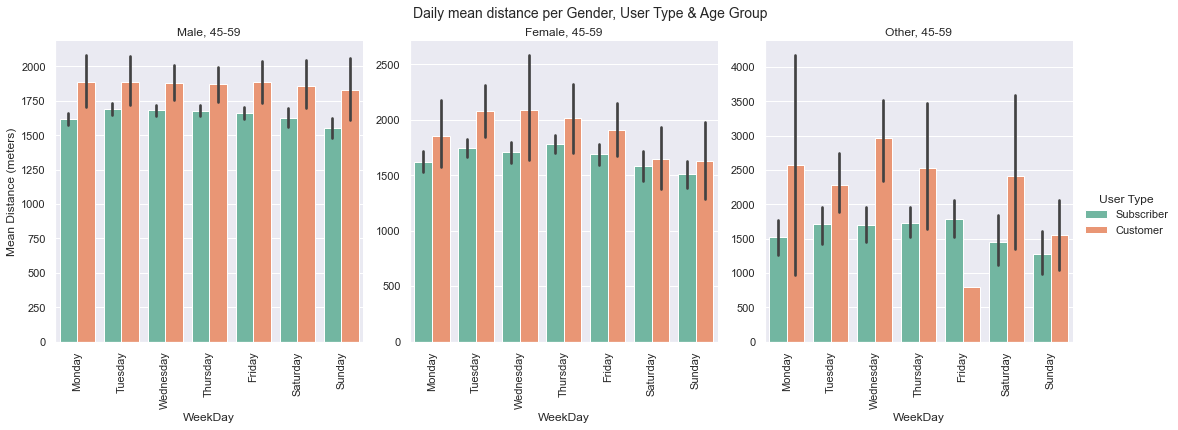

In [35]:
sns.set(rc={'figure.figsize':(16,16)})
g = sns.catplot(data=df.query('age_group == "45-59"'), col="member_gender", row='age_group', hue='user_type', palette="Set2",order=order, sharey=False, kind='bar', y='linear_distance_meters', x='start_day') 
g.set_axis_labels('WeekDay', 'Mean Distance (meters)', '{row_name}')
g.set_xticklabels(rotation=90)
g._legend.set_title('User Type')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily mean distance per Gender, User Type & Age Group', fontsize=14, y=1.02);

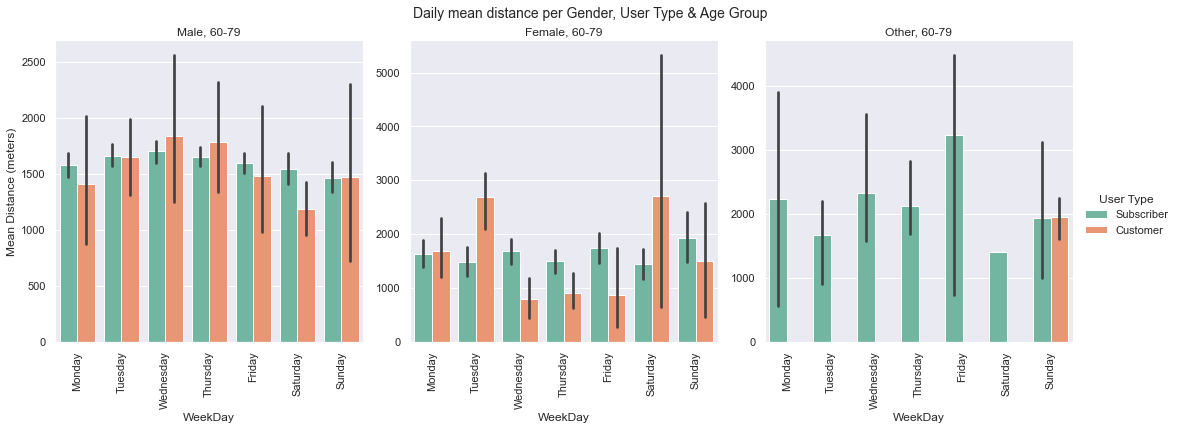

In [36]:
sns.set(rc={'figure.figsize':(16,16)})
g = sns.catplot(data=df.query('age_group == "60-79"'), col="member_gender", row='age_group', hue='user_type', palette="Set2",order=order, sharey=False, kind='bar', y='linear_distance_meters', x='start_day') 
g.set_axis_labels('WeekDay', 'Mean Distance (meters)', '{row_name}')
g.set_xticklabels(rotation=90)
g._legend.set_title('User Type')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily mean distance per Gender, User Type & Age Group', fontsize=14, y=1.02);

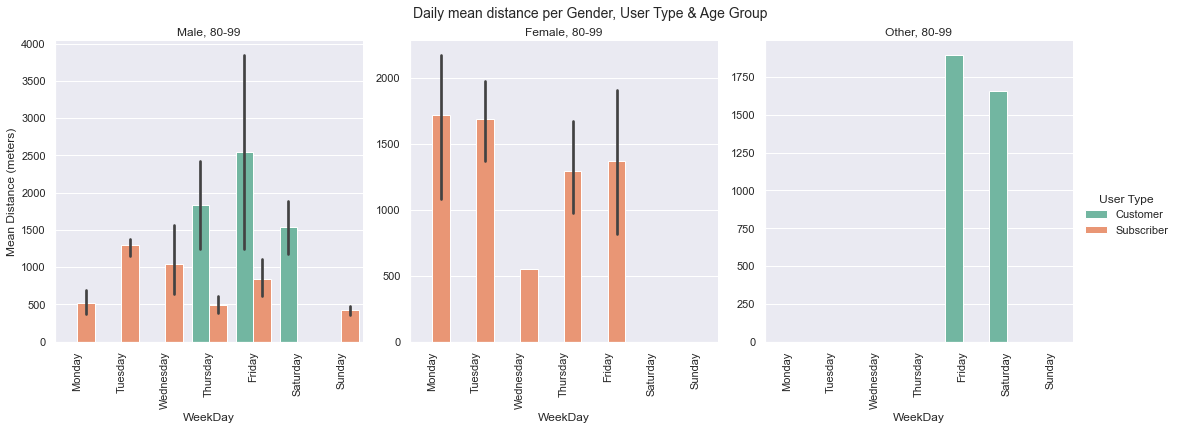

In [37]:
sns.set(rc={'figure.figsize':(16,16)})
g = sns.catplot(data=df.query('age_group == "80-99"'), col="member_gender", row='age_group', hue='user_type', palette="Set2",order=order, sharey=False, kind='bar', y='linear_distance_meters', x='start_day') 
g.set_axis_labels('WeekDay', 'Mean Distance (meters)', '{row_name}')
g.set_xticklabels(rotation=90)
g._legend.set_title('User Type')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily mean distance per Gender, User Type & Age Group', fontsize=14, y=1.02);

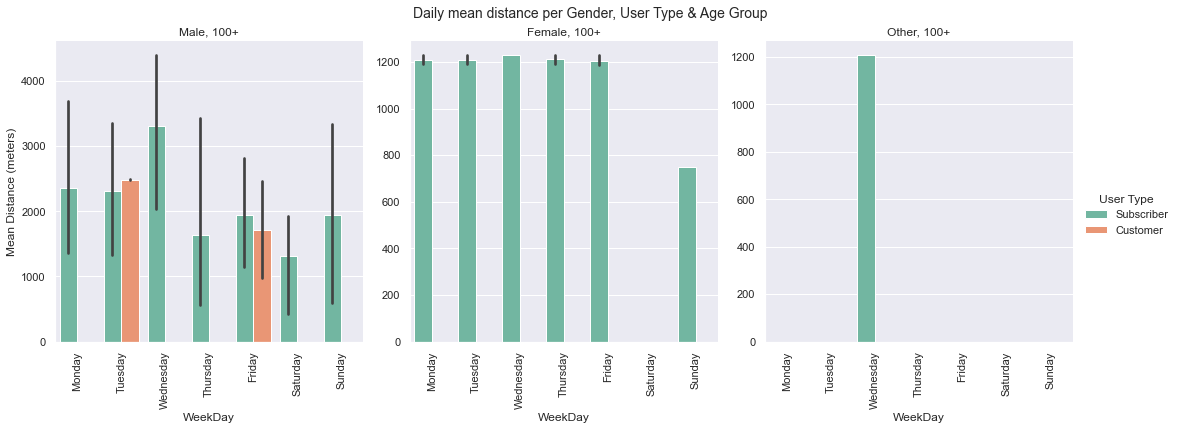

In [38]:
sns.set(rc={'figure.figsize':(16,16)})
g = sns.catplot(data=df.query('age_group == "100+"'), col="member_gender", row='age_group', hue='user_type', palette="Set2",order=order, sharey=False, kind='bar', y='linear_distance_meters', x='start_day') 
g.set_axis_labels('WeekDay', 'Mean Distance (meters)', '{row_name}')
g.set_xticklabels(rotation=90)
g._legend.set_title('User Type')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily mean distance per Gender, User Type & Age Group', fontsize=14, y=1.02);

<Figure size 1152x1152 with 0 Axes>

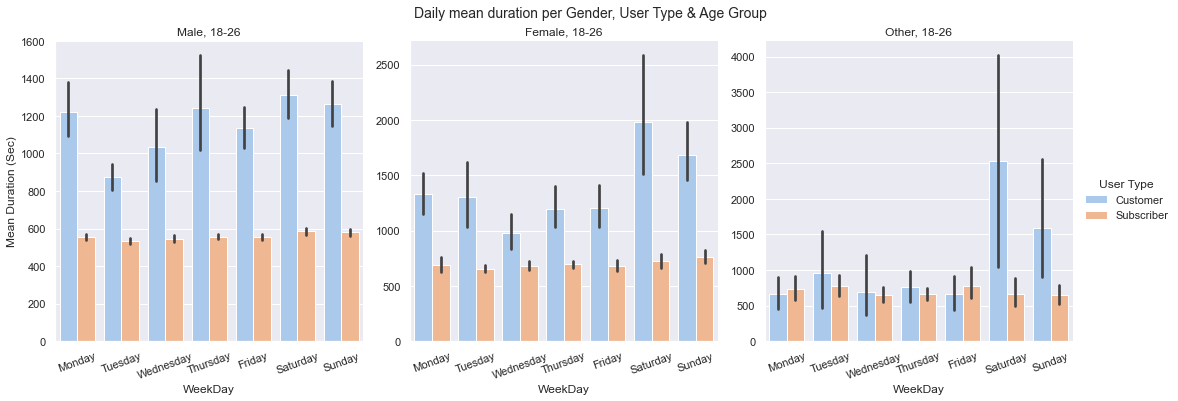

In [51]:
plt.figure(figsize =(16,16))
plt.subplots_adjust(hspace=1.2)
g = sns.catplot(data=df.query('age_group == "18-26"'), col="member_gender", row='age_group', hue='user_type', palette="pastel", order=order, sharey=False, sharex=False, kind='bar', y='duration_sec', x='start_day') 
g.set_axis_labels('WeekDay', 'Mean Duration (Sec)', '{row_name}')
g.set_xticklabels(rotation=20)
g._legend.set_title('User Type')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily mean duration per Gender, User Type & Age Group', fontsize=14, y=1.02);
plt.show()

<Figure size 1152x1152 with 0 Axes>

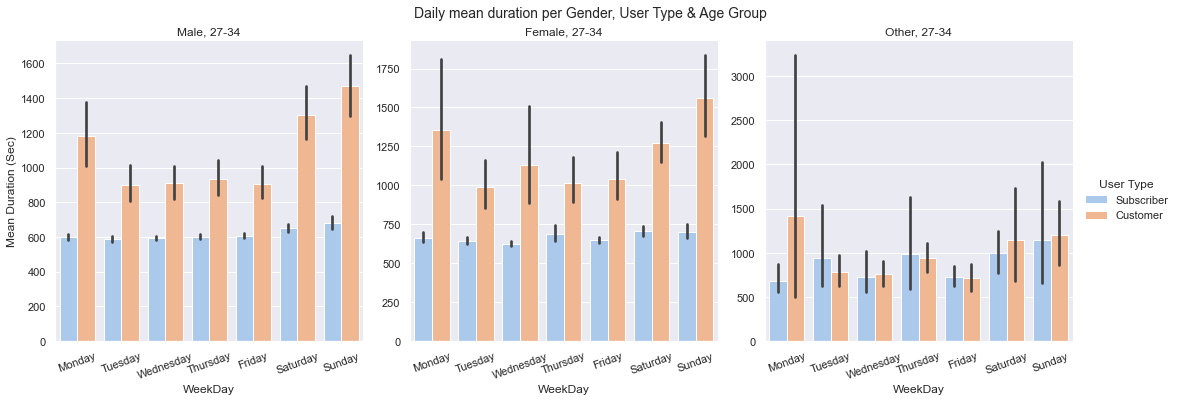

In [52]:
sns.set(rc={'figure.figsize':(16,16)})
plt.subplots_adjust(hspace=1.2)
g = sns.catplot(data=df.query('age_group == "27-34"'), col="member_gender", row='age_group', hue='user_type', palette="pastel", order=order, sharey=False, sharex=False, kind='bar', y='duration_sec', x='start_day') 
g.set_axis_labels('WeekDay', 'Mean Duration (Sec)', '{row_name}')
g.set_xticklabels(rotation=20)
g._legend.set_title('User Type')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily mean duration per Gender, User Type & Age Group', fontsize=14, y=1.02);
plt.show()

<Figure size 1152x1152 with 0 Axes>

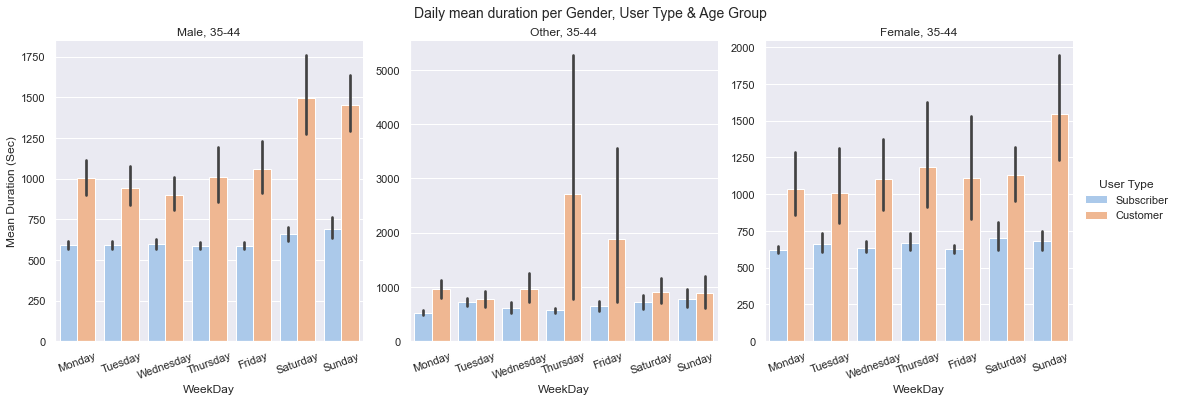

In [55]:
sns.set(rc={'figure.figsize':(16,16)})
plt.subplots_adjust(hspace=1.2)
g = sns.catplot(data=df.query('age_group == "35-44"'), col="member_gender", row='age_group', hue='user_type', palette="pastel", order=order, sharey=False, sharex=False, kind='bar', y='duration_sec', x='start_day') 
g.set_axis_labels('WeekDay', 'Mean Duration (Sec)', '{row_name}')
g.set_xticklabels(rotation=20)
g._legend.set_title('User Type')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily mean duration per Gender, User Type & Age Group', fontsize=14, y=1.02);

<Figure size 1152x1152 with 0 Axes>

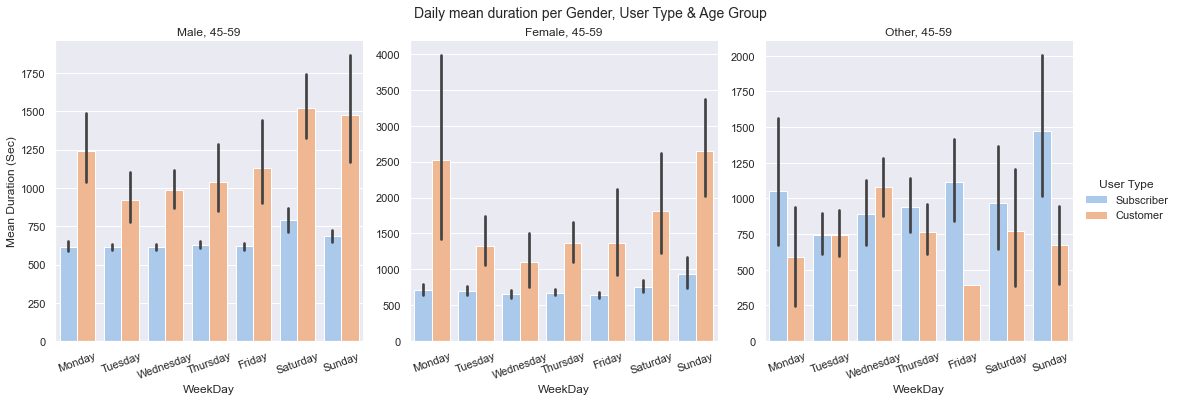

In [56]:
sns.set(rc={'figure.figsize':(16,16)})
plt.subplots_adjust(hspace=1.2)
g = sns.catplot(data=df.query('age_group == "45-59"'), col="member_gender", row='age_group', hue='user_type', palette="pastel", order=order, sharey=False, sharex=False, kind='bar', y='duration_sec', x='start_day') 
g.set_axis_labels('WeekDay', 'Mean Duration (Sec)', '{row_name}')
g.set_xticklabels(rotation=20)
g._legend.set_title('User Type')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily mean duration per Gender, User Type & Age Group', fontsize=14, y=1.02);

<Figure size 1152x1152 with 0 Axes>

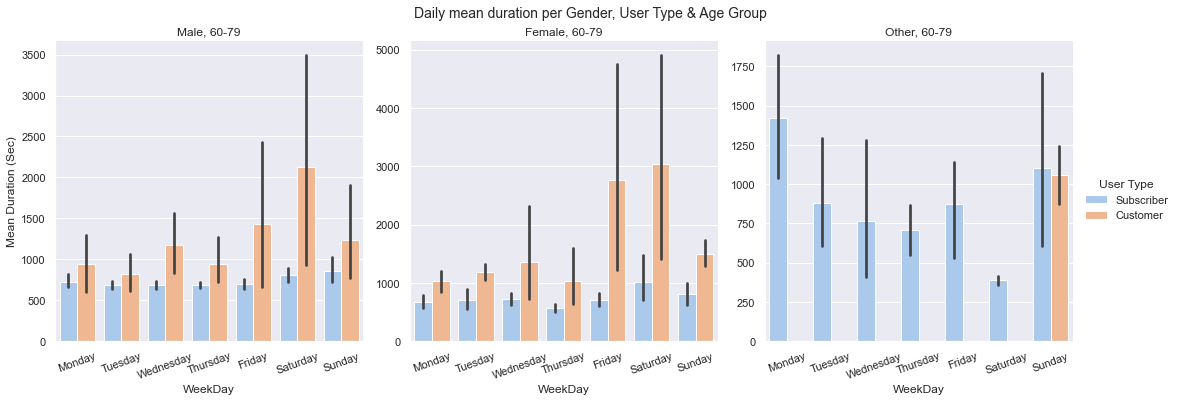

In [57]:
sns.set(rc={'figure.figsize':(16,16)})
plt.subplots_adjust(hspace=1.2)
g = sns.catplot(data=df.query('age_group == "60-79"'), col="member_gender", row='age_group', hue='user_type', palette="pastel", order=order, sharey=False, sharex=False, kind='bar', y='duration_sec', x='start_day') 
g.set_axis_labels('WeekDay', 'Mean Duration (Sec)', '{row_name}')
g.set_xticklabels(rotation=20)
g._legend.set_title('User Type')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily mean duration per Gender, User Type & Age Group', fontsize=14, y=1.02);

<Figure size 1152x1152 with 0 Axes>

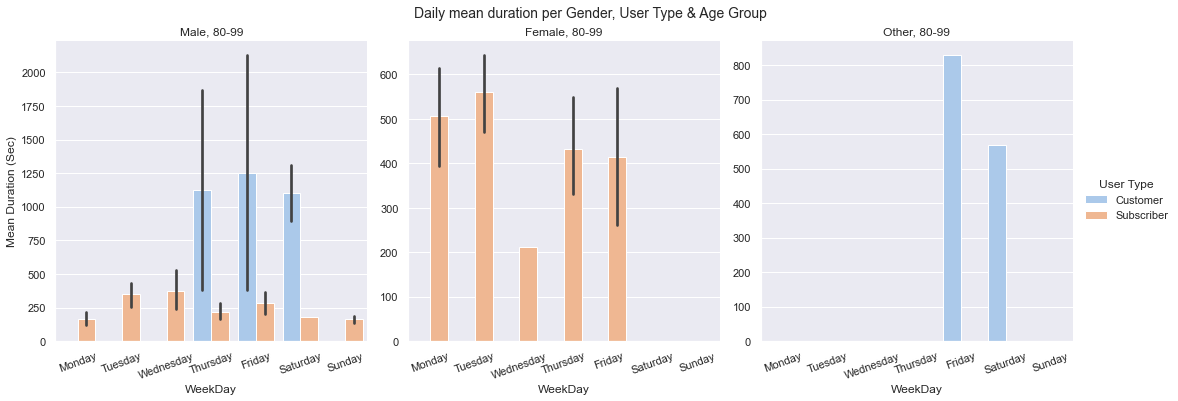

In [58]:
sns.set(rc={'figure.figsize':(16,16)})
plt.subplots_adjust(hspace=1.2)
g = sns.catplot(data=df.query('age_group == "80-99"'), col="member_gender", row='age_group', hue='user_type', palette="pastel", order=order, sharey=False, sharex=False, kind='bar', y='duration_sec', x='start_day') 
g.set_axis_labels('WeekDay', 'Mean Duration (Sec)', '{row_name}')
g.set_xticklabels(rotation=20)
g._legend.set_title('User Type')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily mean duration per Gender, User Type & Age Group', fontsize=14, y=1.02);

<Figure size 1152x1152 with 0 Axes>

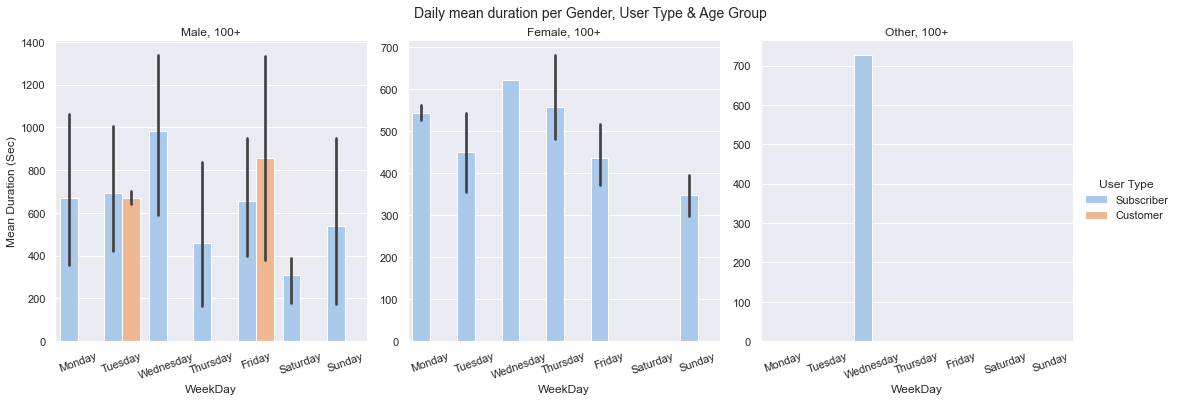

In [59]:
sns.set(rc={'figure.figsize':(16,16)})
plt.subplots_adjust(hspace=1.2)
g = sns.catplot(data=df.query('age_group == "100+"'), col="member_gender", row='age_group', hue='user_type', palette="pastel", order=order, sharey=False, sharex=False, kind='bar', y='duration_sec', x='start_day') 
g.set_axis_labels('WeekDay', 'Mean Duration (Sec)', '{row_name}')
g.set_xticklabels(rotation=20)
g._legend.set_title('User Type')
g.set_titles('{col_name}, {row_name}')
g.fig.suptitle('Daily mean duration per Gender, User Type & Age Group', fontsize=14, y=1.02);

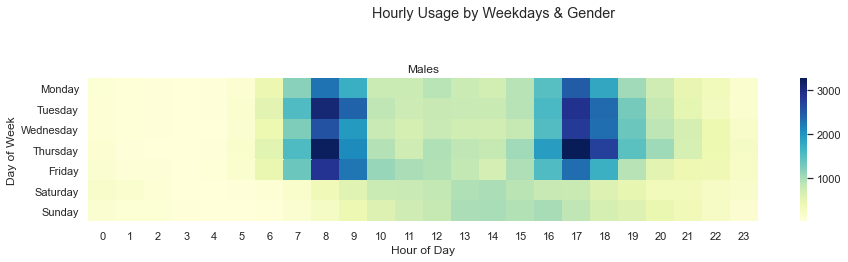

In [39]:
sns.set(rc={'figure.figsize':(15,10)})
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Hourly Usage by Weekdays & Gender')
plt.tight_layout()

plt.subplot(3,1,1)
Male = df.query('member_gender == "Male"')
m_counts = Male.groupby(['start_day', 'start_hour']).size()
m_counts = m_counts.reset_index(name='count')
m_counts = m_counts.pivot(index='start_day', columns='start_hour', values='count')
m_counts = m_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.heatmap(m_counts, cmap='YlGnBu', annot = False);
plt.title('Males', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

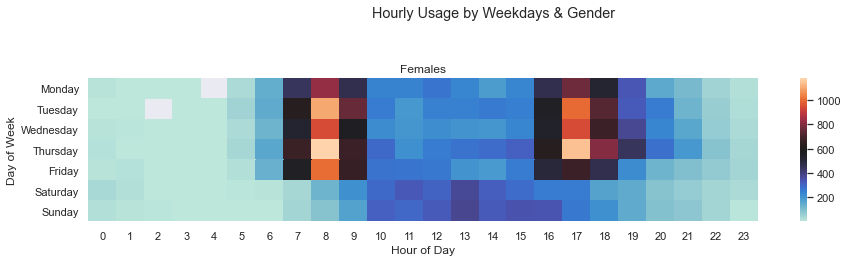

In [40]:
sns.set(rc={'figure.figsize':(15,10)})
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Hourly Usage by Weekdays & Gender')
plt.tight_layout()

plt.subplot(3,1,1)
Female = df.query('member_gender == "Female"')
f_counts = Female.groupby(['start_day', 'start_hour']).size()
f_counts = f_counts.reset_index(name='count')
f_counts = f_counts.pivot(index='start_day', columns='start_hour', values='count')
f_counts = f_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.heatmap(f_counts, cmap='icefire', annot=False);
plt.title('Females', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


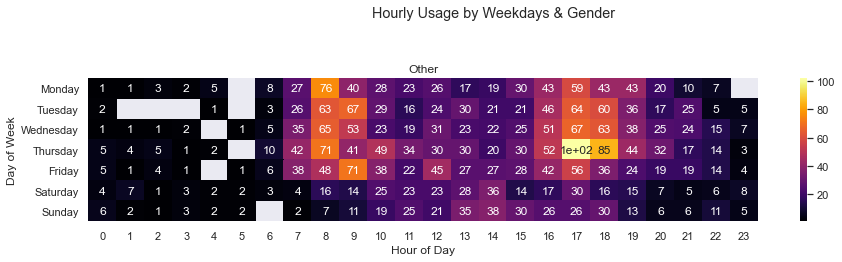

In [41]:
sns.set(rc={'figure.figsize':(15,10)})
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Hourly Usage by Weekdays & Gender')
plt.tight_layout()

plt.subplot(3,1,1)
Other = df.query('member_gender == "Other"')
o_counts = Other.groupby(['start_day', 'start_hour']).size()
o_counts = o_counts.reset_index(name='count')
o_counts = o_counts.pivot(index='start_day', columns='start_hour', values='count')
o_counts = o_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.heatmap(o_counts, cmap='inferno',annot=True);
plt.title('Other', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

### Key Findings & Insights ###
* The Analysis showed that the majority of users are subscribers & they mostly use the service for commuting to & from work at peak hours of 8-9 am & 5-6 pm on weekdays.
* It also shows a unimodal more normally distributed timings on the weekends around the after noon
* The majority of the users are males with a significant amount of females & around 2% non-binary users
* Users Age vary significantly between 18 & 140 years old with the majority of the users between 18 & 44 years of age
* February 13th (a weekday) showed a significant drop in demand & Feb 25th (a weekend) showed an unexplained rise in demand



### Key Findings & Insights cont.###
* A lot of the trips were noticed to have a zero distance meaning that it's a round trip which suggest their use for running quick errands or recreational use specially that there duration are typically around the 10 minutes mark
* The Average distance seem to decrease on weekends vs. weekdays while the average duration acts in an opposite manner which could be explained by the fact that people are usually more rushed during commuting times
* There's an increase in the demand on weekends amongst the youngest & oldest age groups
* Customers have longer distances & durations vs. the average subscriber
* The main cluster of data lies below 8 Kms & between the 10 & 60 minutes mark